In [1]:
import pandas as pd
import sys


sys.path.append('../../')
from src.plot_helpers import plot_experiment_range,plot_correlation_matrix
from src.transform import transform_diff_avg,load_json

smart_sense_cols = load_json("../../json/locations.json")["smart_sense"]

## Load data

In [2]:
df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True,low_memory=False)
df

aqi_palas  averaging      cn  co      co2  dcn  \
datetime                                                              
2024-10-11 13:24:18        NaN        NaN     NaN NaN   566.00  NaN   
2024-10-11 13:33:57        NaN        NaN     NaN NaN   528.00  NaN   
2024-10-11 13:43:57        NaN        NaN     NaN NaN   596.00  NaN   
2024-10-11 13:44:34        NaN        NaN     NaN NaN   675.00  NaN   
2024-10-11 13:54:27        NaN        NaN     NaN NaN   701.00  NaN   
...                        ...        ...     ...  ..      ...  ...   
2024-10-23 13:31:00      82.00       60.0  910.15 NaN  1047.80   ->   
2024-10-23 13:32:00      82.00       60.0  930.16 NaN  1041.80   ->   
2024-10-23 13:33:00      82.77       60.0  942.98 NaN  1049.43   ->   
2024-10-23 13:34:00      83.00       60.0  930.83 NaN  1116.17   ->   
2024-10-23 13:35:00      83.00       60.0  892.17 NaN  1213.57   ->   

                     formaldehyde  global_error  humidity  indoor_nox_index  \
datetime                                                                      
2024-10-11 13:24:18           3.0           NaN     58.00               NaN   
2024-10-11 13:33:57          11.0           NaN     58.00               NaN   
2024-10-11 13:43:57          36.0           NaN     57.00               NaN   
2024-10-11 13:44:34          42.0           NaN     57.00               NaN   
2024-10-11 13:54:27          41.0           NaN     57.00               NaN   
...                           ...           ...       ...               ...   
2024-10-23 13:31:00           NaN           0.0     58.04               NaN   
2024-10-23 13:32:00           NaN           0.0     58.21               NaN   
2024-10-23 13:33:00           NaN           0.0     58.21               NaN   
2024-10-23 13:34:00           NaN           0.0     58.75               NaN   
2024-10-23 13:35:00           NaN           0.0     58.52               NaN   

                     ...  temperature   tvoc  tvoc_ppb   voc  volume_flow  \
datetime             ...                                                    
2024-10-11 13:24:18  ...        20.50    0.0       NaN   NaN          NaN   
2024-10-11 13:33:57  ...        21.00   87.0       NaN   NaN          NaN   
2024-10-11 13:43:57  ...        22.20  103.0       NaN   NaN          NaN   
2024-10-11 13:44:34  ...        22.70  103.0       NaN   NaN          NaN   
2024-10-11 13:54:27  ...        23.00  102.0       NaN   NaN          NaN   
...                  ...          ...    ...       ...   ...          ...   
2024-10-23 13:31:00  ...        23.08    NaN       NaN  6.25          1.0   
2024-10-23 13:32:00  ...        23.09    NaN       NaN  6.21          1.0   
2024-10-23 13:33:00  ...        23.08    NaN       NaN  6.33          1.0   
2024-10-23 13:34:00  ...        23.08    NaN       NaN  6.48          1.0   
2024-10-23 13:35:00  ...        23.37    NaN       NaN  6.68          1.0   

                     x10_dcn  x16_dcn  x50_dcn  x84_dcn  x90_dcn  
datetime                                                          
2024-10-11 13:24:18      NaN      NaN      NaN      NaN      NaN  
2024-10-11 13:33:57      NaN      NaN      NaN      NaN      NaN  
2024-10-11 13:43:57      NaN      NaN      NaN      NaN      NaN  
2024-10-11 13:44:34      NaN      NaN      NaN      NaN      NaN  
2024-10-11 13:54:27      NaN      NaN      NaN      NaN      NaN  
...                      ...      ...      ...      ...      ...  
2024-10-23 13:31:00     0.19      0.2     0.24     0.31     0.33  
2024-10-23 13:32:00     0.19      0.2     0.24     0.31     0.33  
2024-10-23 13:33:00     0.19      0.2     0.24     0.31     0.33  
2024-10-23 13:34:00     0.19      0.2     0.24     0.31     0.33  
2024-10-23 13:35:00     0.19      0.2     0.25     0.31     0.33  

[578609 rows x 38 columns]

In [6]:
df_smart_sense = df.loc[df['sensor'] == 'smart_sense'][smart_sense_cols]
df_smart_sense

co2  temperature  humidity  indoor_nox_index  \
datetime                                                              
2024-10-11 10:39:00  439.0        19.06     73.80               NaN   
2024-10-11 10:39:00  482.0        19.08     73.44               0.0   
2024-10-11 10:40:00  668.0        19.34     71.29               0.0   
2024-10-11 10:41:00  604.0        19.52     69.47               0.0   
2024-10-11 10:42:00  539.0        19.60     68.93               0.0   
...                    ...          ...       ...               ...   
2024-10-21 10:32:00  600.0        21.14     49.14               2.0   
2024-10-21 10:33:00  603.0        21.16     49.22               2.0   
2024-10-21 10:34:00  603.0        21.18     49.19               2.0   
2024-10-21 10:35:00  602.0        21.19     49.20               2.0   
2024-10-21 10:36:00  603.0        21.21     49.31               2.0   

                     indoor_voc_index  pm_1.0  pm_2.5  pm_10  
datetime                                                      
2024-10-11 10:39:00               NaN     NaN     NaN    NaN  
2024-10-11 10:39:00               0.0     NaN     NaN    NaN  
2024-10-11 10:40:00               0.0     6.5     9.7   10.6  
2024-10-11 10:41:00               0.0     6.5     9.7   10.6  
2024-10-11 10:42:00               0.0     4.9     7.2    8.1  
...                               ...     ...     ...    ...  
2024-10-21 10:32:00              15.0    15.0    23.9   26.6  
2024-10-21 10:33:00              15.0    15.8    24.7   26.8  
2024-10-21 10:34:00              15.0    15.8    24.7   26.8  
2024-10-21 10:35:00              15.0    15.6    24.4   26.5  
2024-10-21 10:36:00              15.0    15.5    24.2   26.3  

[14117 rows x 8 columns]

## Correlation matrix

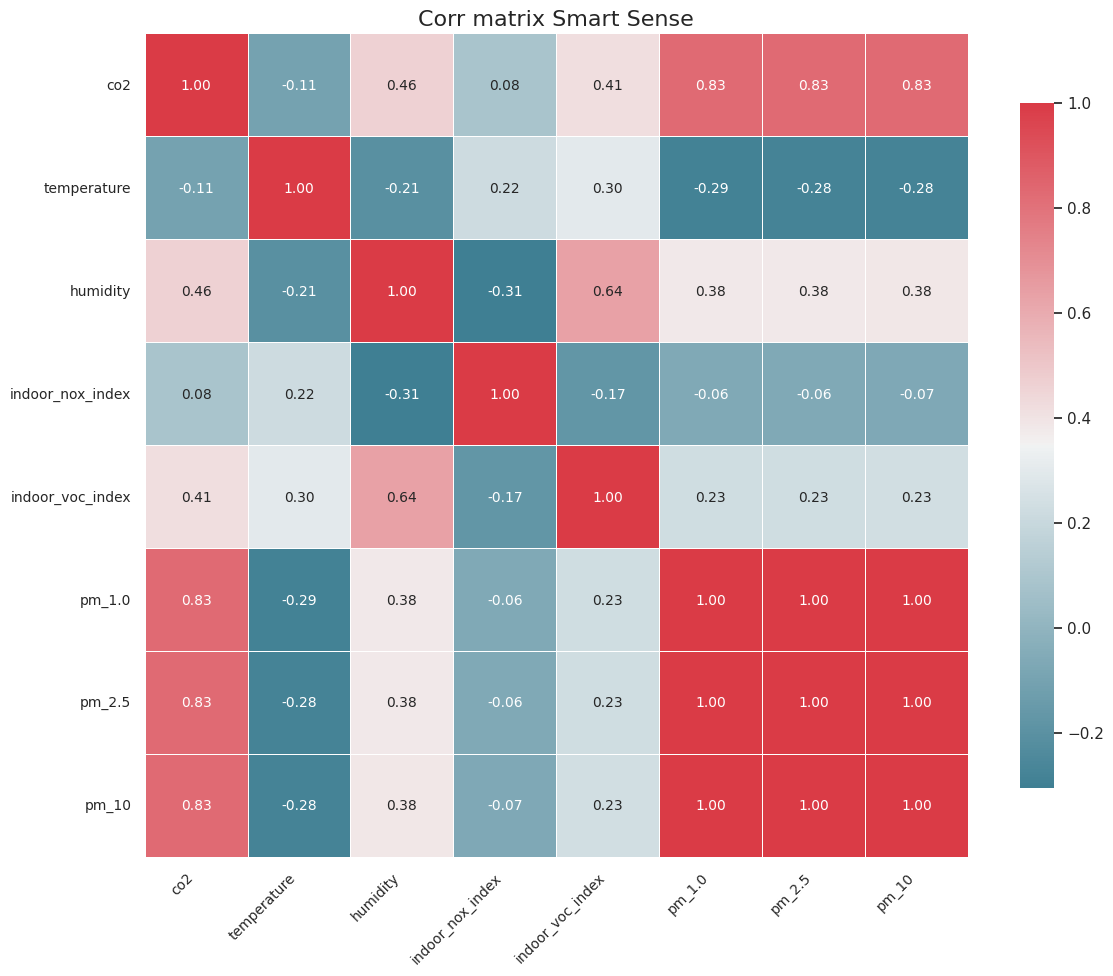

In [16]:
plot_correlation_matrix(df=df_smart_sense.corr(),title=f"Corr matrix Smart Sense")

## PAHs

### Time series plots

In [17]:
plot_experiment_range(df=df_smart_sense.resample('240s').mean(),col_names=['pm_10','pm_1.0','pm_2.5'])


### diff percentage plot

In [18]:
plot_experiment_range(df=df_smart_sense.resample('240s').mean().pct_change() * 100,col_names=['pm_10','pm_1.0','pm_2.5'])

/tmp/ipykernel_1906201/3197533296.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



## CO2

### Time series

In [19]:
plot_experiment_range(df=df_smart_sense.resample('240s').mean(),col_names=['co2'])

### diff plot

In [20]:
plot_experiment_range(df=df_smart_sense.resample('240s').mean().pct_change() * 100,col_names=['co2'])

/tmp/ipykernel_1906201/934623957.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



## Temperature and Humidity

### time series plot

In [21]:
plot_experiment_range(df=df_smart_sense.resample('240s').mean(),col_names=['temperature','humidity'])



## NOC and VOC index

### time series plot

In [26]:
plot_experiment_range(df=df_smart_sense.resample('240s').mean(),col_names=['indoor_voc_index','indoor_nox_index'],min_value=0,max_value=210)

### diff plot

In [31]:
plot_experiment_range(df=df_smart_sense.resample('240s').mean().pct_change() * 100,col_names=['indoor_voc_index','indoor_nox_index'],min_value=0,max_value=210)

/tmp/ipykernel_1906201/3797731158.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



## Overall analysis

In [32]:
diff_df = transform_diff_avg(df_smart_sense.resample('240s').mean())
diff_df.dropna(axis=1,inplace=True)

/home/usr1_tt/collocation_study/notebooks/sensor/../../src/transform.py:15: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



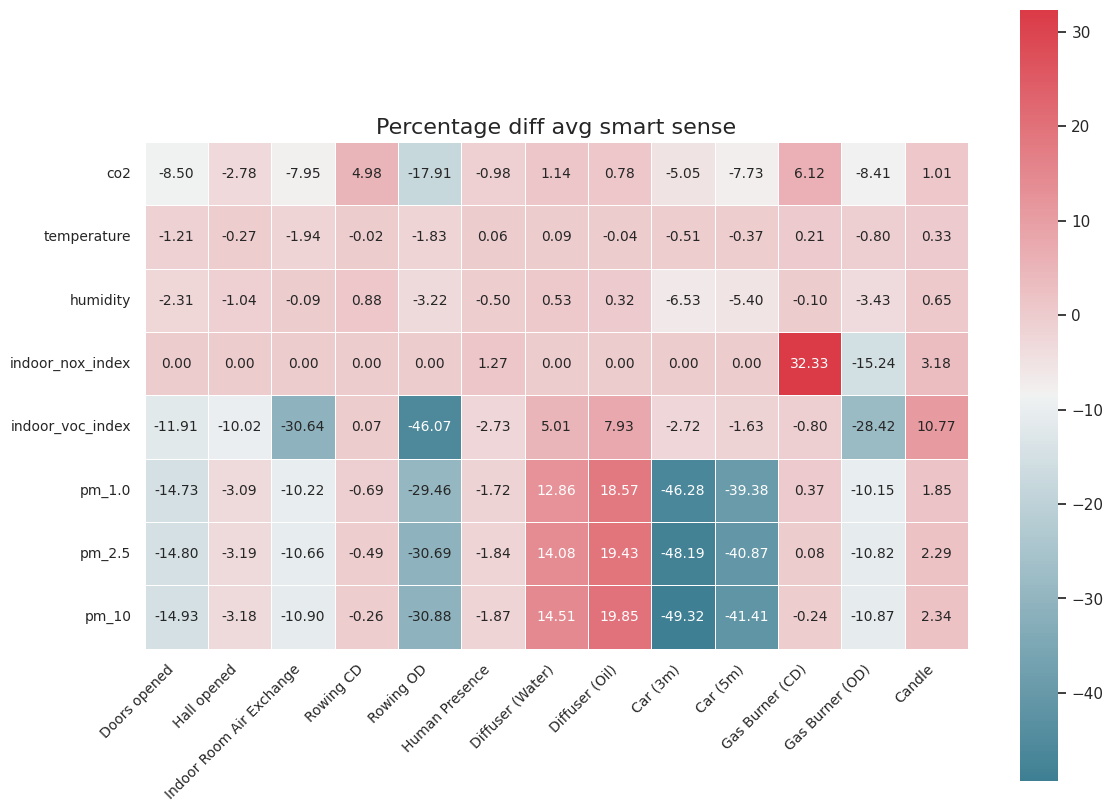

In [34]:
plot_correlation_matrix(diff_df,title="Percentage diff avg smart sense")